In [1]:
import pandas as pd
import numpy as np
import seaborn as sns    
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib import rcParams  

In [2]:
table1 = pd.read_csv('Final-Feature Engineering.csv')
table1

,Date,home_team,away_team,half_Time_score,full_Time_score,firsthalf_home_goals,firsthalf_away_goals,total_home_goals,total_away_goals,firsthalf_result,result,Season
0,Sat Aug 8 2015,Bournemouth,Aston Villa,0-0,0-1,0,0,0,1,Draw,Aston Villa,2015-2016
1,Sat Aug 8 2015,Chelsea,Swansea,2-1,2-2,2,1,2,2,Chelsea,Draw,2015-2016
2,Sat Aug 8 2015,Everton,Watford,0-1,2-2,0,1,2,2,Watford,Draw,2015-2016
3,Sat Aug 8 2015,Leicester,Sunderland,3-0,4-2,3,0,4,2,Leicester,Leicester,2015-2016
4,Sat Aug 8 2015,Man United,Tottenham,1-0,1-0,1,0,1,0,Man United,Man United,2015-2016
...,...,...,...,...,...,...,...,...,...,...,...,...
1803,Sat Mar 7 2020,Wolves,Brighton,0-0,0-0,0,0,0,0,Draw,Draw,2019-2020
1804,Sat Mar 7 2020,Burnley,Tottenham,1-0,1-1,1,0,1,1,Burnley,Draw,2019-2020
1805,Sun Mar 8 2020,Chelsea,Everton,2-0,4-0,2,0,4,0,Chelsea,Chelsea,2019-2020
1806,Sun Mar 8 2020,Man United,Man City,1-0,2-0,1,0,2,0,Man United,Man United,2019-2020


In [3]:
df_games_1 = pd.DataFrame({'home_games' : table1.groupby("home_team")['home_team'].count()}).reset_index()
df_games_2 = pd.DataFrame({'away_games' : table1.groupby("away_team")['away_team'].count()}).reset_index()

df_games = pd.concat([df_games_1, df_games_2], axis=1)
df_games['games'] = df_games_1['home_games'] + df_games_2['away_games']
df_games = df_games.drop(columns=['away_team', 'home_games', 'away_games'])
df_games = df_games.rename(columns={'home_team': 'team'})

df_home_goals = pd.DataFrame({'home_goals' : table1.groupby("home_team")['total_home_goals'].sum()}).reset_index()
df_away_goals = pd.DataFrame({'away_goals' : table1.groupby("away_team")['total_away_goals'].sum()}).reset_index()

df_goals_scored = pd.concat([df_home_goals, df_away_goals], axis=1)
df_goals_scored['goals'] = df_goals_scored['home_goals'] + df_goals_scored['away_goals']
df_goals_scored = df_goals_scored.drop(columns=['away_team', 'home_goals', 'away_goals'])
df_goals_scored = df_goals_scored.rename(columns={'home_team': 'team'})

columns = df_games.copy()
columns = columns.merge(right=df_goals_scored, on='team')

df_won = pd.DataFrame({'won' : table1['result'].value_counts()}).reset_index()
df_won = df_won.drop([0])
df_won = df_won.rename(columns={'index': 'team'})

columns1 = columns.copy()
columns1 = columns1.merge(right=df_won, on='team')

draw_filter = table1[table1['result'] == 'Draw']
df_draw_home = pd.DataFrame({'draw_home' : draw_filter['home_team'].value_counts()}).reset_index()
df_draw_away = pd.DataFrame({'draw_away' : draw_filter['away_team'].value_counts()}).reset_index()

df_draw = df_draw_home.merge(right=df_draw_away, on='index')
df_draw['draw'] = df_draw['draw_home'] + df_draw['draw_away']
df_draw = df_draw.drop(columns=['draw_home', 'draw_away'])
df_draw = df_draw.rename(columns={'index': 'team'})
df_draw

columns1 = columns1.merge(right=df_draw, on='team')
columns1['lost'] = columns1['games'] - columns1['won'] - columns1['draw']
columns1['points'] = (columns1['won'] * 3) + (columns1['draw'])

columns1['pos'] = range(1,len(columns1)+1)
columns1 = columns1[['team', 'games', 'won', 'draw', 'lost', 'points']]
columns1

,team,games,won,draw,lost,points
0,Arsenal,180,92,43,45,319
1,Aston Villa,66,10,12,44,42
2,Bournemouth,181,54,42,85,204
3,Brighton,105,24,33,48,105
4,Burnley,143,47,32,64,173
5,Cardiff,38,10,4,24,34
6,Chelsea,181,98,39,44,333
7,Crystal Palace,181,58,41,82,215
8,Everton,181,66,50,65,248
9,Fulham,38,7,5,26,26


In [4]:
top_games = columns1.nlargest(30,['games'])
top_games

,team,games,won,draw,lost,points
12,Leicester,181,78,43,60,277
2,Bournemouth,181,54,42,85,204
27,West Ham,181,60,48,73,228
25,Watford,181,54,41,86,203
24,Tottenham,181,102,39,40,345
6,Chelsea,181,98,39,44,333
7,Crystal Palace,181,58,41,82,215
8,Everton,181,66,50,65,248
20,Southampton,181,56,50,75,218
15,Man United,181,93,48,40,327


/Users/jawdatshaat/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'games played')

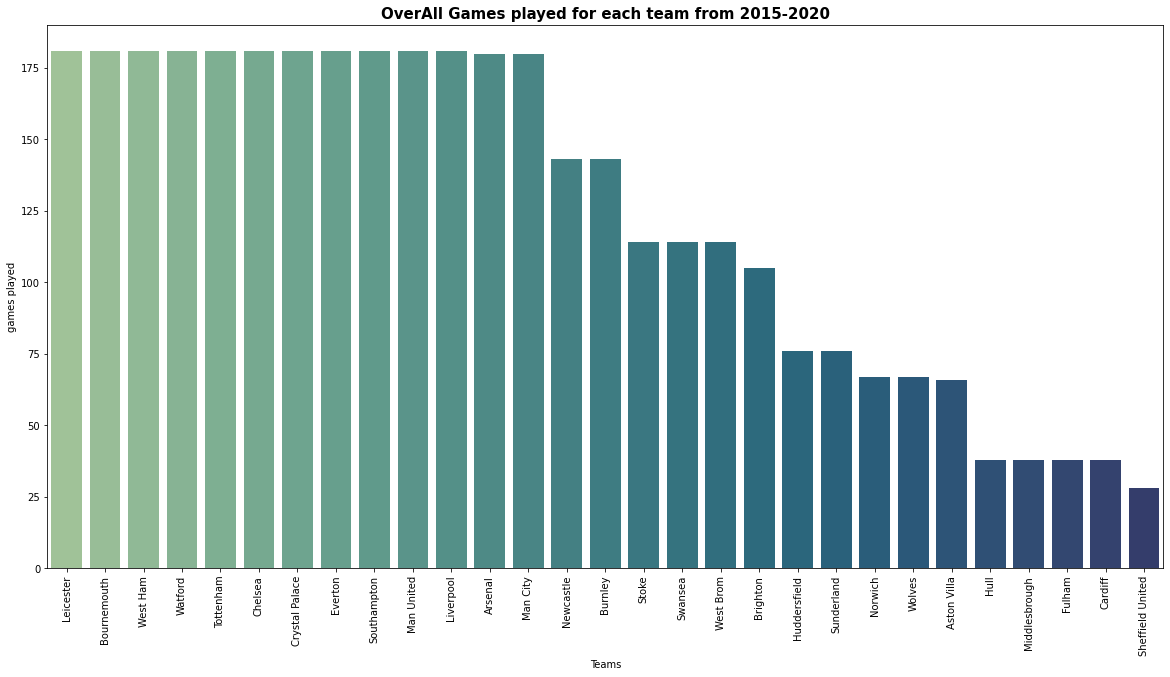

In [5]:
j =top_games['team']
s =top_games['games']
plt.rcParams['figure.figsize'] = [20,10]
sns.barplot(j,s,color='blue',palette="crest")
plt.xticks(rotation=90)
plt.title("OverAll Games played for each team from 2015-2020", weight='bold',size=15)
plt.xlabel("Teams")
plt.ylabel("games played")

In [6]:
Figure= table1.groupby(['Season'])[['Season']].count()
Figure

,Season
Season,
2015-2016,380
2016-2017,380
2017-2018,380
2018-2019,380
2019-2020,288


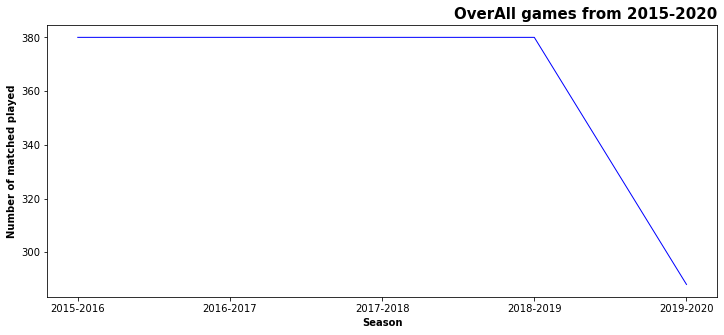

In [7]:
Figure1 = Figure
plt.figure(figsize=(12,5))
plt.style.use('default')
plt.plot(Figure1.index,'Season', data=Figure1, color='blue', linewidth=1)
plt.xlabel('Season', fontsize=10,weight='bold')
plt.ylabel('Number of matched played', fontsize=10,weight='bold')
plt.title('OverAll games from 2015-2020', loc='Right', fontsize=15,weight='bold')
plt.savefig("OverAll games from 2015-2020.jpg")
plt.show()

In [8]:
df2 = table1.groupby('Season')
df2

In [9]:
table2 = season = df2.get_group('2016-2017')
table2

,Date,home_team,away_team,half_Time_score,full_Time_score,firsthalf_home_goals,firsthalf_away_goals,total_home_goals,total_away_goals,firsthalf_result,result,Season
380,Sat Aug 13 2016,Burnley,Swansea,0-0,0-1,0,0,0,1,Draw,Swansea,2016-2017
381,Sat Aug 13 2016,Crystal Palace,West Brom,0-0,0-1,0,0,0,1,Draw,West Brom,2016-2017
382,Sat Aug 13 2016,Everton,Tottenham,1-0,1-1,1,0,1,1,Everton,Draw,2016-2017
383,Sat Aug 13 2016,Hull,Leicester,1-0,2-1,1,0,2,1,Hull,Hull,2016-2017
384,Sat Aug 13 2016,Man City,Sunderland,1-0,2-1,1,0,2,1,Man City,Man City,2016-2017
...,...,...,...,...,...,...,...,...,...,...,...,...
755,Sun May 21 2017,Liverpool,Middlesbrough,1-0,3-0,1,0,3,0,Liverpool,Liverpool,2016-2017
756,Sun May 21 2017,Man United,Crystal Palace,2-0,2-0,2,0,2,0,Man United,Man United,2016-2017
757,Sun May 21 2017,Southampton,Stoke,0-0,0-1,0,0,0,1,Draw,Stoke,2016-2017
758,Sun May 21 2017,Swansea,West Brom,0-1,2-1,0,1,2,1,West Brom,Swansea,2016-2017


In [10]:
df_games_1 = pd.DataFrame({'home_games' : table2.groupby("home_team")['home_team'].count()}).reset_index()
df_games_2 = pd.DataFrame({'away_games' : table2.groupby("away_team")['away_team'].count()}).reset_index()

df_games = pd.concat([df_games_1, df_games_2], axis=1)
df_games['games'] = df_games_1['home_games'] + df_games_2['away_games']
df_games = df_games.drop(columns=['away_team', 'home_games', 'away_games'])
df_games = df_games.rename(columns={'home_team': 'team'})

df_home_goals = pd.DataFrame({'home_goals' : table2.groupby("home_team")['total_home_goals'].sum()}).reset_index()
df_away_goals = pd.DataFrame({'away_goals' : table2.groupby("away_team")['total_away_goals'].sum()}).reset_index()

df_goals_scored = pd.concat([df_home_goals, df_away_goals], axis=1)
df_goals_scored['goals'] = df_goals_scored['home_goals'] + df_goals_scored['away_goals']
df_goals_scored = df_goals_scored.drop(columns=['away_team', 'home_goals', 'away_goals'])
df_goals_scored = df_goals_scored.rename(columns={'home_team': 'team'})

columns = df_games.copy()
columns = columns.merge(right=df_goals_scored, on='team')

df_won = pd.DataFrame({'won' : table2['result'].value_counts()}).reset_index()
df_won = df_won.drop([0])
df_won = df_won.rename(columns={'index': 'team'})

columns1 = columns.copy()
columns1 = columns1.merge(right=df_won, on='team')

draw_filter = table2[table2['result'] == 'Draw']
df_draw_home = pd.DataFrame({'draw_home' : draw_filter['home_team'].value_counts()}).reset_index()
df_draw_away = pd.DataFrame({'draw_away' : draw_filter['away_team'].value_counts()}).reset_index()

df_draw = df_draw_home.merge(right=df_draw_away, on='index')
df_draw['draw'] = df_draw['draw_home'] + df_draw['draw_away']
df_draw = df_draw.drop(columns=['draw_home', 'draw_away'])
df_draw = df_draw.rename(columns={'index': 'team'})
df_draw

columns1 = columns1.merge(right=df_draw, on='team')
columns1['lost'] = columns1['games'] - columns1['won'] - columns1['draw']
columns1['points'] = (columns1['won'] * 3) + (columns1['draw'])
columns1 = columns1.sort_values(by='points', ascending=False)
columns1['pos'] = range(1,len(columns1)+1)
columns1 = columns1[['team', 'games', 'won', 'draw', 'lost', 'points']]
columns1

,team,games,won,draw,lost,points
15,Tottenham,38,26,8,4,86
8,Man City,38,23,9,6,78
7,Liverpool,38,22,10,6,76
0,Arsenal,38,23,6,9,75
9,Man United,38,18,15,5,69
4,Everton,38,17,10,11,61
1,Bournemouth,38,12,10,16,46
11,Southampton,38,12,10,16,46
17,West Brom,38,12,9,17,45
18,West Ham,38,12,9,17,45


In [11]:
top_points_2016_17 = columns1 [['team', 'points']] [:6] 
top_points_2016_17

,team,points
15,Tottenham,86
8,Man City,78
7,Liverpool,76
0,Arsenal,75
9,Man United,69
4,Everton,61


/Users/jawdatshaat/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Overall Points')

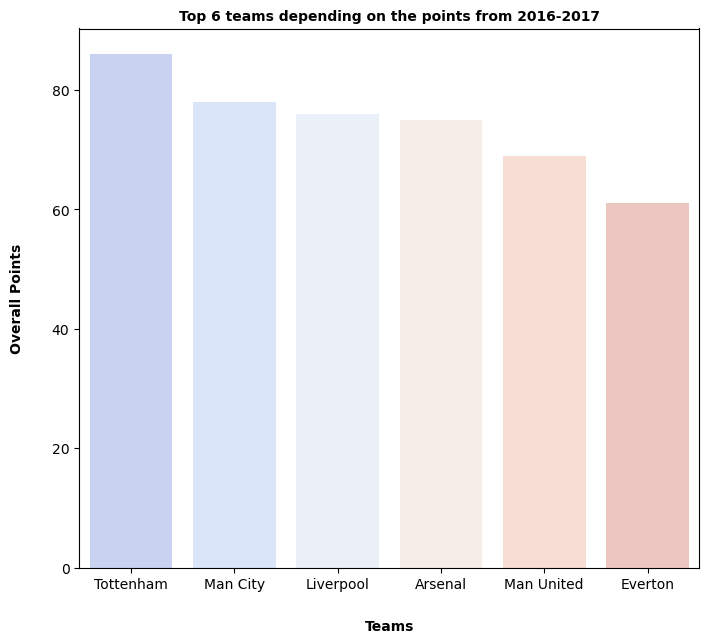

In [12]:
j =top_points_2016_17['team'] 
s =top_points_2016_17['points']
plt.rcParams['figure.figsize'] = [8,7]
sns.barplot(j,s,palette="coolwarm", alpha=0.4, color='', zorder=1)
plt.title("Top 6 teams depending on the points from 2016-2017", weight='bold',size=10)
plt.xlabel("Teams",labelpad=20, weight='bold', size=10)
plt.ylabel("Overall Points",labelpad=20, weight='bold', size=10)

In [13]:
players4 = pd.read_csv('england-premier-league-players-2019-to-2020-stats.csv')
players4

,full_name,age,birthday,birthday_GMT,league,season,position,Current Club,minutes_played_overall,minutes_played_home,...,conceded_per_90_overall,min_per_conceded_overall,min_per_match,min_per_card_overall,min_per_assist_overall,cards_per_90_overall,rank_in_league_top_attackers,rank_in_league_top_midfielders,rank_in_league_top_defenders,rank_in_club_top_scorer
0,Aaron Anthony Connolly,21,949017600,1/28/2000,Premier League,2019/2020,Forward,Brighton & Hove Albion,1262,592,...,1.50,60,53,0,1262,0.00,89,172,-1,3
1,Aaron Cresswell,32,629683200,12/15/1989,Premier League,2019/2020,Defender,West Ham United,2730,1395,...,1.62,56,88,390,0,0.23,151,260,129,6
2,Aaron Lennon,34,545529600,4/16/1987,Premier League,2019/2020,Midfielder,Burnley,485,225,...,2.60,35,30,121,0,0.74,320,402,-1,17
3,Aaron Mooy,31,653356800,9/15/1990,Premier League,2019/2020,Midfielder,Brighton & Hove Albion,2090,1010,...,1.29,70,67,697,1045,0.13,164,140,-1,8
4,Aaron Ramsdale,23,895104000,5/14/1998,Premier League,2019/2020,Goalkeeper,AFC Bournemouth,3330,1620,...,1.65,55,90,0,3330,0.00,362,248,135,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,Youri Tielemans,24,862963200,5/7/1997,Premier League,2019/2020,Midfielder,Leicester City,2834,1433,...,1.08,83,77,1417,472,0.06,159,64,-1,8
611,Yves Bissouma,25,841363200,8/30/1996,Premier League,2019/2020,Midfielder,Brighton & Hove Albion,1263,636,...,1.28,70,57,316,0,0.29,188,265,-1,13
612,Zechariah Medley,21,962928000,7/7/2000,Premier League,2019/2020,Defender,Arsenal,0,0,...,0.00,0,0,0,0,0.00,-1,-1,-1,-1
613,Ørjan Håskjold Nyland,31,652924800,9/10/1990,Premier League,2019/2020,Goalkeeper,Aston Villa,537,360,...,2.01,45,77,0,0,0.00,311,331,161,18


In [14]:
players4.drop(['birthday', 'birthday_GMT','nationality' ,'minutes_played_overall', 'minutes_played_home', 'minutes_played_away',
             'goals_away','assists_away','goals_per_90_home','min_per_goal_overall','age','position','league','rank_in_league_top_midfielders',
             'appearances_home','appearances_away','goals_home','assists_home', 'penalty_goals','penalty_misses',
             'conceded_overall','conceded_home','conceded_away','goals_involved_per_90_overall',
             'assists_per_90_overall','goals_per_90_overall','goals_per_90_away','conceded_per_90_overall',
             'min_per_conceded_overall','min_per_match','min_per_card_overall','min_per_assist_overall',
             'cards_per_90_overall','rank_in_league_top_attackers','rank_in_league_top_defenders',
             'rank_in_club_top_scorer','clean_sheets_overall','clean_sheets_home','clean_sheets_away'], axis=1, inplace=True)

In [15]:
players4

,full_name,season,Current Club,appearances_overall,goals_overall,assists_overall,yellow_cards_overall,red_cards_overall
0,Aaron Anthony Connolly,2019/2020,Brighton & Hove Albion,24,3,1,0,0
1,Aaron Cresswell,2019/2020,West Ham United,31,3,0,7,0
2,Aaron Lennon,2019/2020,Burnley,16,0,0,4,0
3,Aaron Mooy,2019/2020,Brighton & Hove Albion,31,2,2,3,1
4,Aaron Ramsdale,2019/2020,AFC Bournemouth,37,0,1,0,0
...,...,...,...,...,...,...,...,...
610,Youri Tielemans,2019/2020,Leicester City,37,3,6,2,0
611,Yves Bissouma,2019/2020,Brighton & Hove Albion,22,1,0,4,0
612,Zechariah Medley,2019/2020,Arsenal,0,0,0,0,0
613,Ørjan Håskjold Nyland,2019/2020,Aston Villa,7,0,0,0,0


In [16]:
top_player4 = players4.nlargest(2,['goals_overall'])
top_player4

,full_name,season,Current Club,appearances_overall,goals_overall,assists_overall,yellow_cards_overall,red_cards_overall
275,Jamie Vardy,2019/2020,Leicester City,35,23,5,2,0
138,Daniel William John Ings,2019/2020,Southampton,38,22,2,3,0


<Figure size 2000x1800 with 0 Axes>

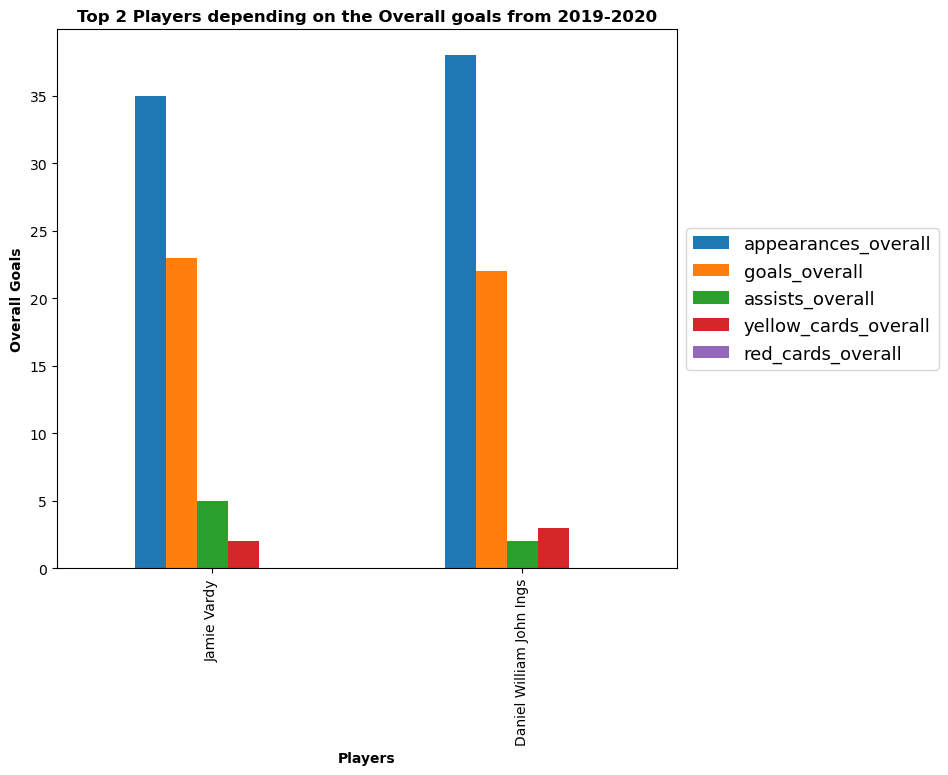

In [17]:
top_player4.index=["Jamie Vardy", "Daniel William John Ings"]
plt.figure(figsize=(20,18))
top_player4.plot(kind='bar')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=13)
plt.title("Top 2 Players depending on the Overall goals from 2019-2020",weight='bold')
plt.xlabel("Players",weight='bold')
plt.ylabel("Overall Goals",weight='bold')
  
# Saving figure by changing parameter values
plt.savefig("Top 2 Players depending on the Overall goals from 2019-2020", bbox_inches="tight",
            pad_inches=0.3, transparent=False)